In [1]:
from keras.datasets import mnist

In [2]:
(trainX,trainY),(testX,testY) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
trainX.shape

(60000, 28, 28)

In [4]:
trainY.shape

(60000,)

In [5]:
import matplotlib.pyplot as plt

Etykieta: 7


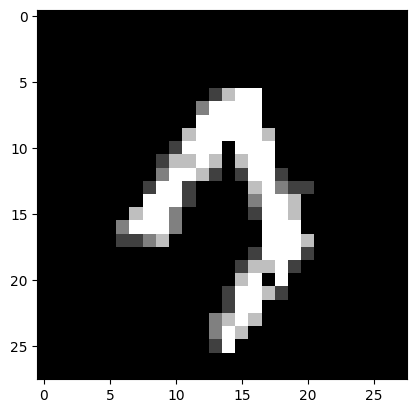

In [6]:
image_index=340
print('Etykieta:',trainY[image_index])
plt.imshow(trainX[image_index],cmap='gray')

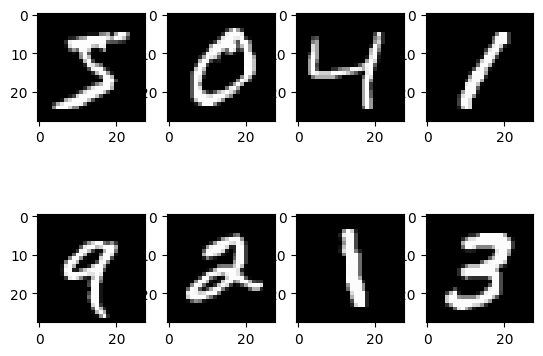

5 0 4 1 9 2 1 3 


In [7]:
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(trainX[i],cmap='gray')
plt.show()
x=''
for i in range(8):
  x=x+str(trainY[i])+' '
print(x)

In [8]:
trainX=trainX.reshape(60000,28*28)
testX=testX.reshape(10000,28*28)

In [9]:
trainX.shape

(60000, 784)

In [11]:
trainX_01=trainX/255
testX_01=testX/255

In [12]:
trainX_01[10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
scaler.fit(trainX)

StandardScaler()

In [16]:
trainX_std=scaler.transform(trainX)
testX_std=scaler.transform(testX)

In [17]:
trainX_std[10]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00441808, -0.00575482, -0.00408252,
       -0.00408252,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00408252, -0.00470969, -0.00879935,
       -0.01159056, -0.01475898, -0.01928485, -0.0246718 , -0.02907103,
       -0.03059266, -0.03116401, -0.03196287, -0.03020254, -0.03131022,
       -0.0283834 , -0.02311919, -0.01916663, -0.0167723 , -0.01099636,
       -0.00832486, -0.00438069,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.00408252, -0.00539535,
       -0.00852241, -0.01198504, -0.01765348, -0.0277109 , -0.03702009,
       -0.05215128, -0.0670362 , -0.08301705, -0.0993793 , -0.11

In [18]:
import time
import pandas as pd

In [19]:
results=pd.DataFrame(columns=('klasyfikator','ocena','czas_uczenia','czas_testu'))

In [20]:
def run(xtr, ytr, xtst, ytst, clf, clf_name):
  global results
  s=time.time()
  x=clf.fit(xtr,ytr)
  time_train=time.time()-s
  s=time.time()
  score_tst=x.score(xtst,ytst)
  time_test=time.time()-s
  print("ocena=%0.4f,czas_uczenia=%0.3f,czas_testu=%0.3f" %(score_tst, time_train, time_test))
  new_row=pd.DataFrame({'klasyfikator':[clf_name],'ocena':[score_tst],'czas_uczenia':[time_train],'czas_testu':[time_test]})
  results=pd.concat([results,new_row],ignore_index=True)

In [21]:
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [22]:
run(trainX, trainY, testX, testY, NearestCentroid(), 'NearestCentroid')
run(trainX_01, trainY, testX_01, testY, NearestCentroid(), 'NearestCentroid')
run(trainX_std, trainY, testX_std, testY, NearestCentroid(), 'NearestCentroid')

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_nearest_centroid.py:244: UserWarning: self.within_class_std_dev_ has at least 1 zero standard deviation.Inputs within the same classes for at least 1 feature are identical.
  warnings.warn(
/tmp/ipython-input-4230201501.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results=pd.concat([results,new_row],ignore_index=True)


ocena=0.8203,czas_uczenia=0.503,czas_testu=0.094


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_nearest_centroid.py:244: UserWarning: self.within_class_std_dev_ has at least 1 zero standard deviation.Inputs within the same classes for at least 1 feature are identical.
  warnings.warn(


ocena=0.8203,czas_uczenia=0.999,czas_testu=0.049


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_nearest_centroid.py:244: UserWarning: self.within_class_std_dev_ has at least 1 zero standard deviation.Inputs within the same classes for at least 1 feature are identical.
  warnings.warn(


ocena=0.8093,czas_uczenia=0.982,czas_testu=0.050


In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
clfs = [NearestCentroid(), KNeighborsClassifier(), GaussianNB(), MultinomialNB(), DecisionTreeClassifier(), LogisticRegression(), MLPClassifier()]

In [25]:
results=results.iloc[0:0]

In [26]:
t_begin=time.time()
for i in clfs:
  print(i)
  run(trainX,trainY,testX,testY,i,i)
  run(trainX_01,trainY,testX_01,testY,i,str(i)+'_01')
  if str(i)[:13] != 'MultinomialNB':
    run(trainX_std,trainY,testX_std,testY,i,str(i)+'_std')
print(time.time()-t_begin)

NearestCentroid()
ocena=0.8203,czas_uczenia=0.757,czas_testu=0.073
ocena=0.8203,czas_uczenia=1.017,czas_testu=0.051
ocena=0.8093,czas_uczenia=1.016,czas_testu=0.052
KNeighborsClassifier()
ocena=0.9688,czas_uczenia=0.006,czas_testu=44.620
ocena=0.9688,czas_uczenia=0.061,czas_testu=39.756
ocena=0.9443,czas_uczenia=0.060,czas_testu=45.693
GaussianNB()
ocena=0.5558,czas_uczenia=0.694,czas_testu=0.876
ocena=0.5558,czas_uczenia=1.116,czas_testu=0.876
ocena=0.5240,czas_uczenia=1.078,czas_testu=0.881
MultinomialNB()
ocena=0.8365,czas_uczenia=5.508,czas_testu=0.060
ocena=0.8357,czas_uczenia=0.312,czas_testu=0.036
DecisionTreeClassifier()
ocena=0.8743,czas_uczenia=27.891,czas_testu=0.020
ocena=0.8764,czas_uczenia=28.112,czas_testu=0.031
ocena=0.8768,czas_uczenia=28.893,czas_testu=0.023
LogisticRegression()
ocena=0.9255,czas_uczenia=52.149,czas_testu=0.056
ocena=0.9257,czas_uczenia=51.109,czas_testu=0.036
ocena=0.9246,czas_uczenia=50.171,czas_testu=0.035
MLPClassifier()
ocena=0.9644,czas_uczenia=

In [27]:
results.sort_values(['ocena'],ascending=False)

,klasyfikator,ocena,czas_uczenia,czas_testu
18,MLPClassifier()_01,0.9792,121.927737,0.093800
19,MLPClassifier()_std,0.9744,110.710826,0.093501
3,KNeighborsClassifier(),0.9688,0.006494,44.619838
4,KNeighborsClassifier()_01,0.9688,0.061317,39.755922
17,MLPClassifier(),0.9644,271.873904,0.122878
5,KNeighborsClassifier()_std,0.9443,0.060330,45.693423
15,LogisticRegression()_01,0.9257,51.108785,0.036294
14,LogisticRegression(),0.9255,52.148566,0.055860
16,LogisticRegression()_std,0.9246,50.170533,0.035288
13,DecisionTreeClassifier()_std,0.8768,28.893235,0.023138


In [28]:
import numpy as np

In [29]:
x=np.append(trainX_01, testX_01, axis=0)
y=np.append(trainY, testY, axis=0)

In [30]:
x.shape

(70000, 784)

In [31]:
y.shape

(70000,)

In [32]:
m=MLPClassifier()

In [33]:
m.fit(x,y)

MLPClassifier()

In [34]:
from PIL import Image

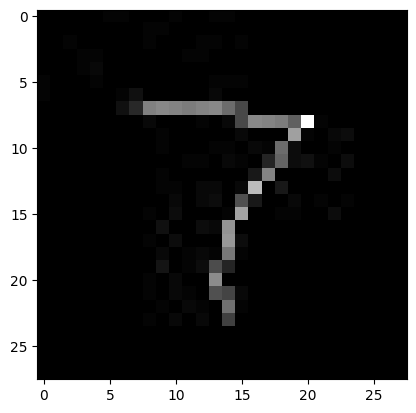

In [35]:
img = Image.open('7.jpg').convert('L')
plt.imshow(img,cmap='gray')

In [36]:
imtar=np.array(img)

In [37]:
imtar[0]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [38]:
imtar=imtar.reshape(1,28*28)

In [39]:
imtar

array([[ 0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  1,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  4,
         0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4, 10, 32, 34, 33, 31,
        33, 34, 27, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

In [40]:
imtar=imtar.astype('float32')

In [41]:
imtar=imtar/255

In [42]:
imtar

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.00392157, 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.00392157, 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.00392157, 0.00392157,
        0.        , 0.00392157, 0.        , 0.  

In [43]:
pred=m.predict(imtar)

In [44]:
print(pred[0])

7
